In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_Recommendation.csv')

# Analysis

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [57]:
df.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [58]:
df.duplicated().sum()

0

In [59]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [60]:
print('# of Unique values for each column:')
for col in df.columns:
    print(col,':',df[col].nunique())

# of Unique values for each column:
Nitrogen : 137
Phosphorus : 117
Potassium : 73
Temperature : 2200
Humidity : 2200
pH_Value : 2200
Rainfall : 2200
Crop : 22


In [61]:
for i in df.columns:
    print("column "+ i + " unique values are: ",df[i].unique())

column Nitrogen unique values are:  [ 90  85  60  74  78  69  94  89  68  91  93  77  88  76  67  83  98  66
  97  84  73  92  95  99  63  62  64  82  79  65  75  71  72  70  86  61
  81  80 100  87  96  40  23  39  22  36  32  58  59  42  28  43  27  50
  25  31  26  54  57  49  46  38  35  52  44  24  29  20  56  37  51  41
  34  30  33  47  53  45  48  13   2  17  12   6  10  19  11  18  21  16
   9   1   7   8   0   3   4   5  14  15  55 105 108 118 101 106 109 117
 114 110 112 111 102 116 119 107 104 103 120 113 115 133 136 126 121 129
 122 140 131 135 123 125 139 132 127 130 134]
column Phosphorus unique values are:  [ 42  58  55  35  37  53  54  46  56  50  48  38  45  40  59  41  47  49
  51  57  39  43  44  60  52  36  72  67  73  70  62  74  66  63  71  78
  80  68  65  77  76  79  61  64  69  75  24  18  26  27  25  21  30  11
   5  10   7  20  22  15  23   8  16  29  17   6  19  13   9  14  28  94
  95  92  89  88  87  85  86  83  91  81  84  90  82  93  33  31  34  32
 130

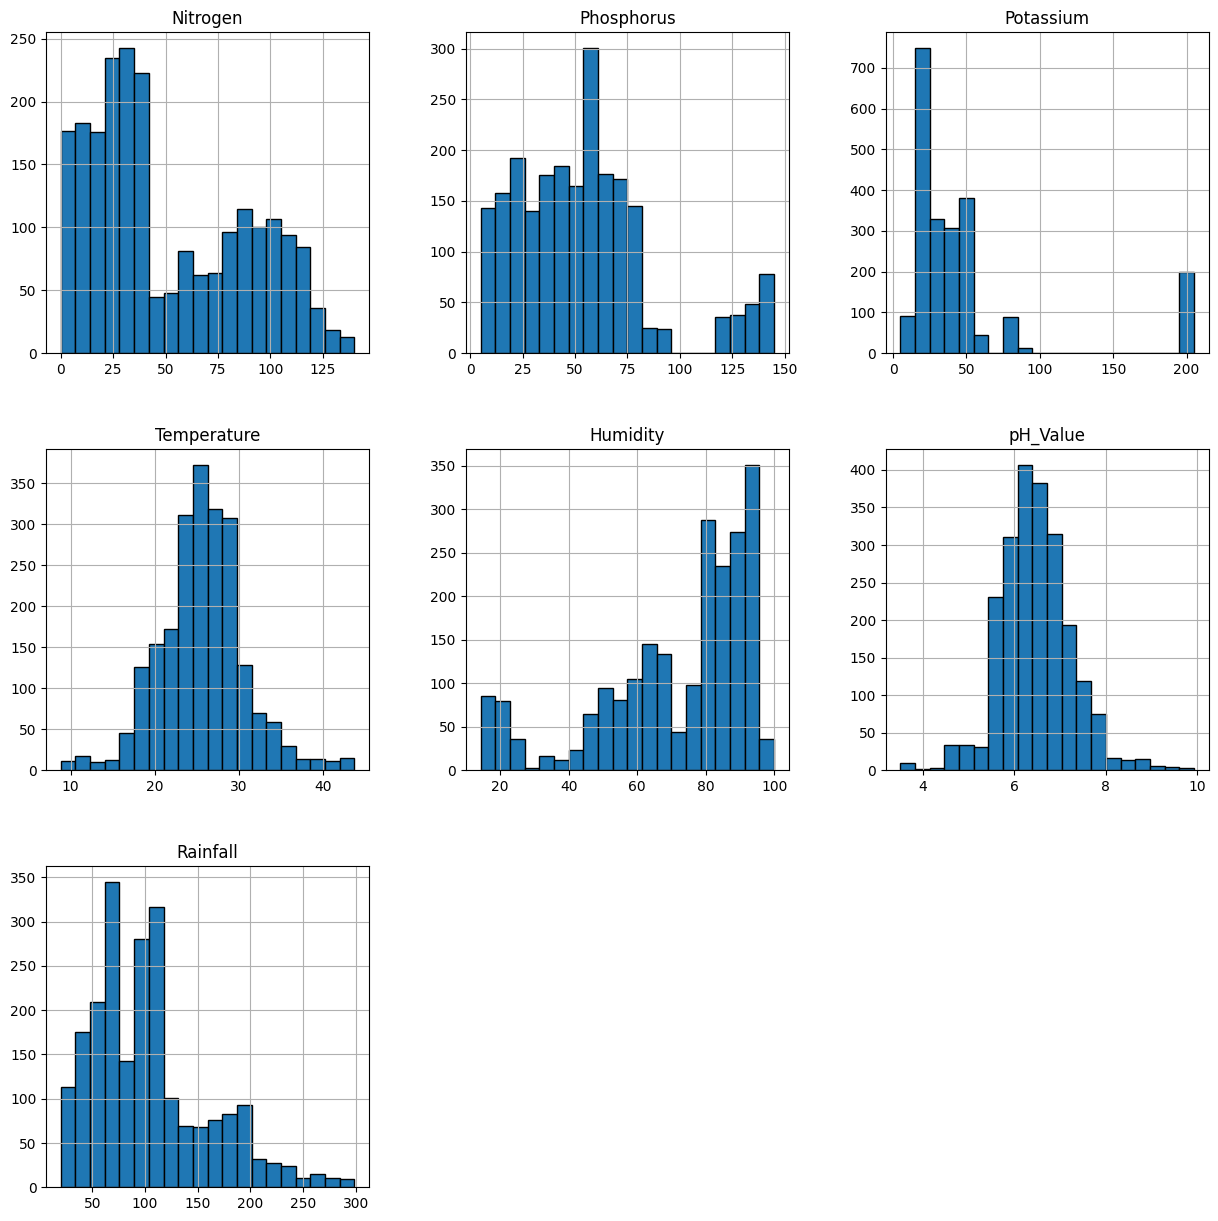

In [62]:
df.hist(figsize=(15,15), edgecolor = 'black', bins = 20)
plt.show()

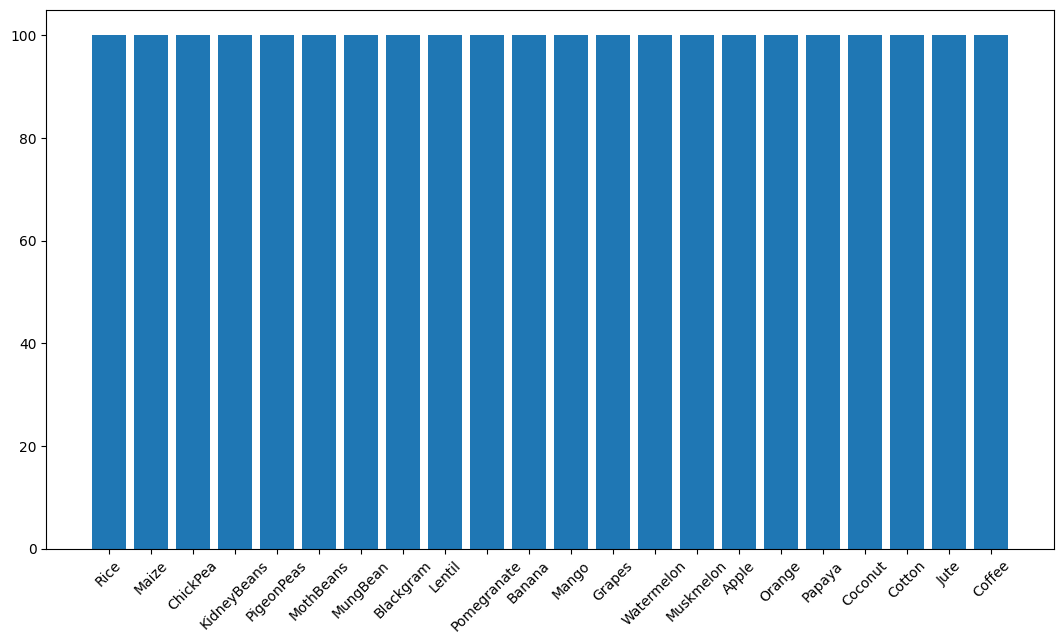

In [63]:
plt.figure(figsize= (13,7))
plt.bar(df['Crop'], df['Crop'].value_counts()[1])
plt.xticks(rotation = 45)
plt.show()

In [64]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

<Axes: xlabel='Features', ylabel='Values'>

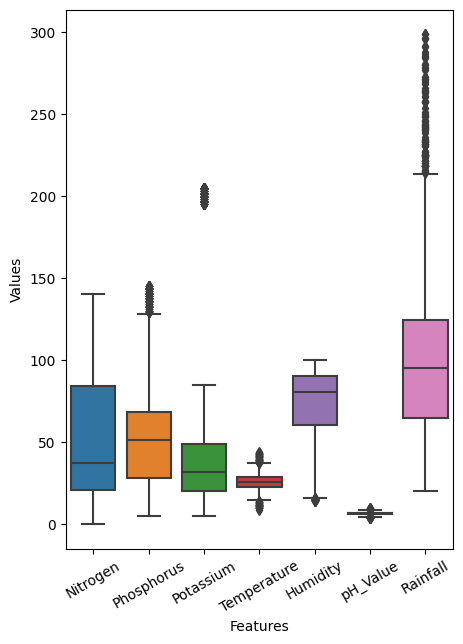

In [65]:
df_melted = df.select_dtypes(exclude = 'object').melt(var_name='Features', value_name='Values')
plt.figure(figsize = (5,7))
plt.xticks(rotation = 30)
sns.boxplot(x='Features', y='Values', data=df_melted)

### Detect outliers

In [66]:
outliers = []
for col in df.columns[:-1]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    low = q1 - (1.5*iqr)
    high = q3 + (1.5*iqr)
    outlier = (df[col] > high) | (df[col] < low)
    print('Number of outliers in' , col , 'column is: ', outlier.sum(), 'Which equals ', round(outlier.sum()/df[col].shape[0],2),'% of the total data')
    outliers.append(outlier)
    

Number of outliers in Nitrogen column is:  0 Which equals  0.0 % of the total data
Number of outliers in Phosphorus column is:  138 Which equals  0.06 % of the total data
Number of outliers in Potassium column is:  200 Which equals  0.09 % of the total data
Number of outliers in Temperature column is:  86 Which equals  0.04 % of the total data
Number of outliers in Humidity column is:  30 Which equals  0.01 % of the total data
Number of outliers in pH_Value column is:  57 Which equals  0.03 % of the total data
Number of outliers in Rainfall column is:  100 Which equals  0.05 % of the total data


#### should we remove or change outliers?

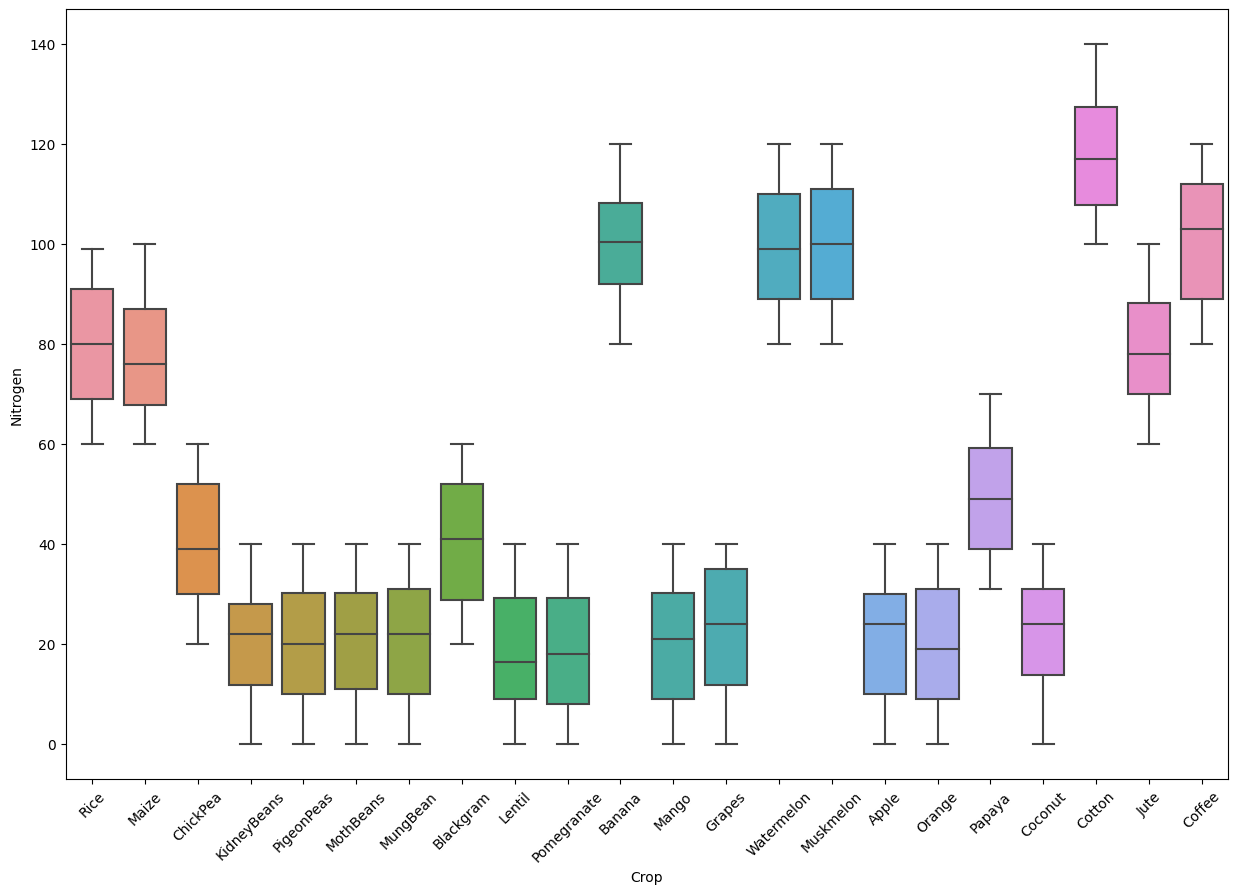

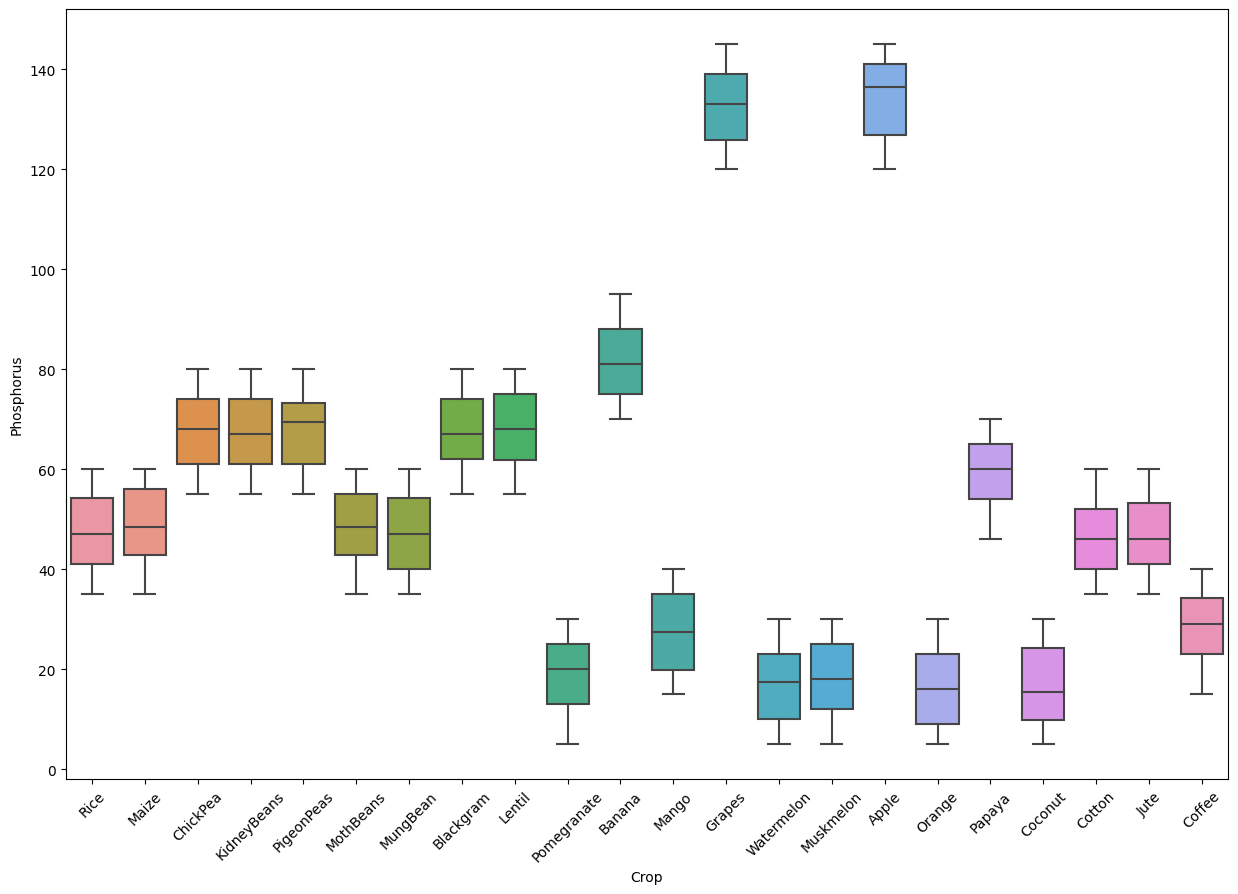

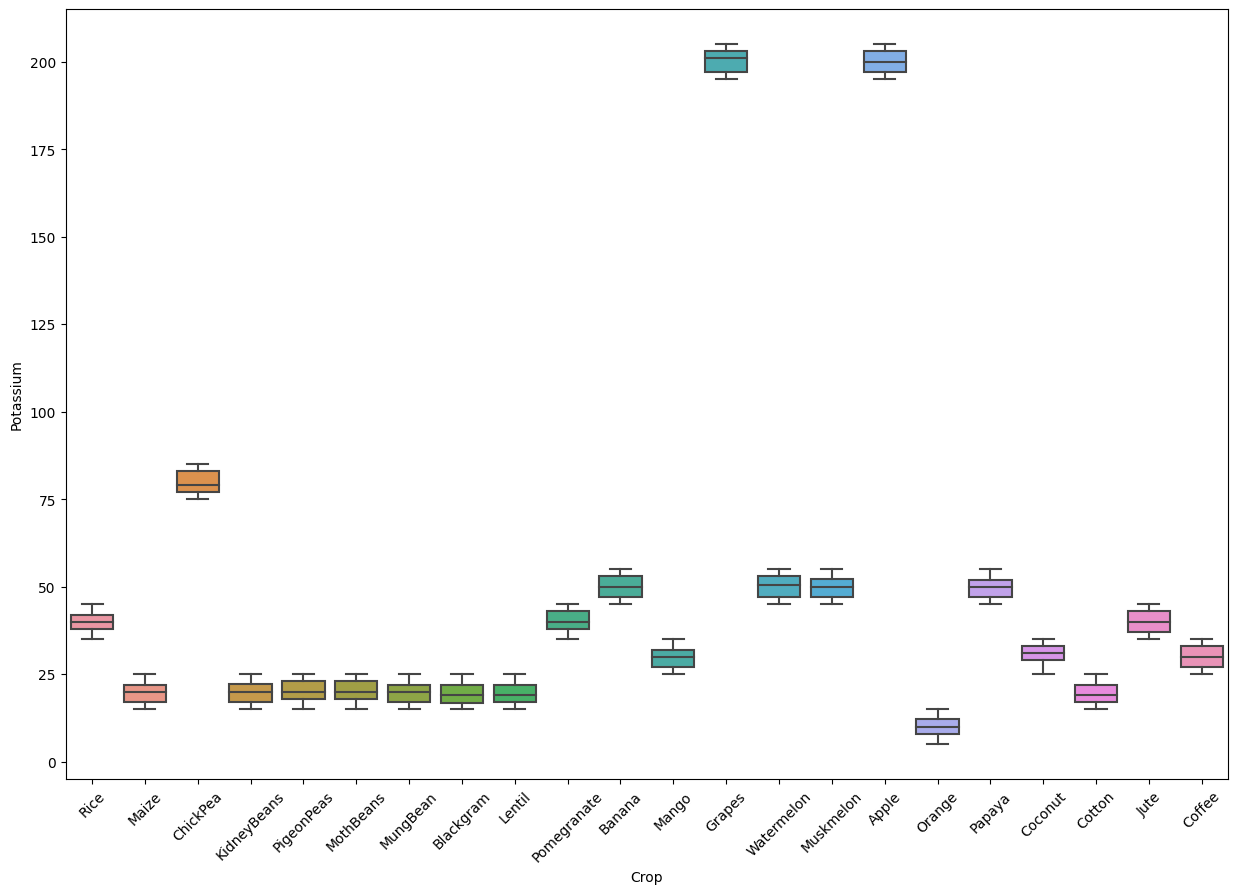

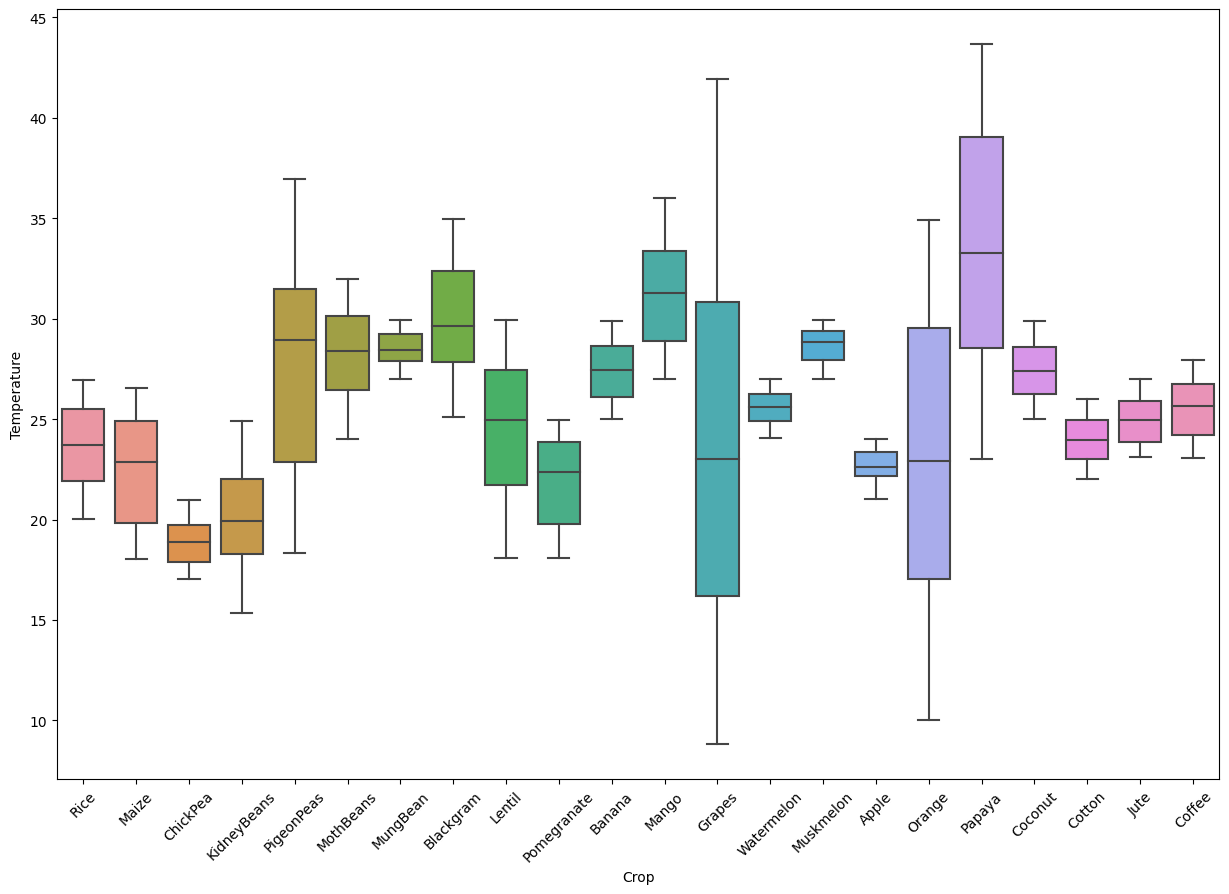

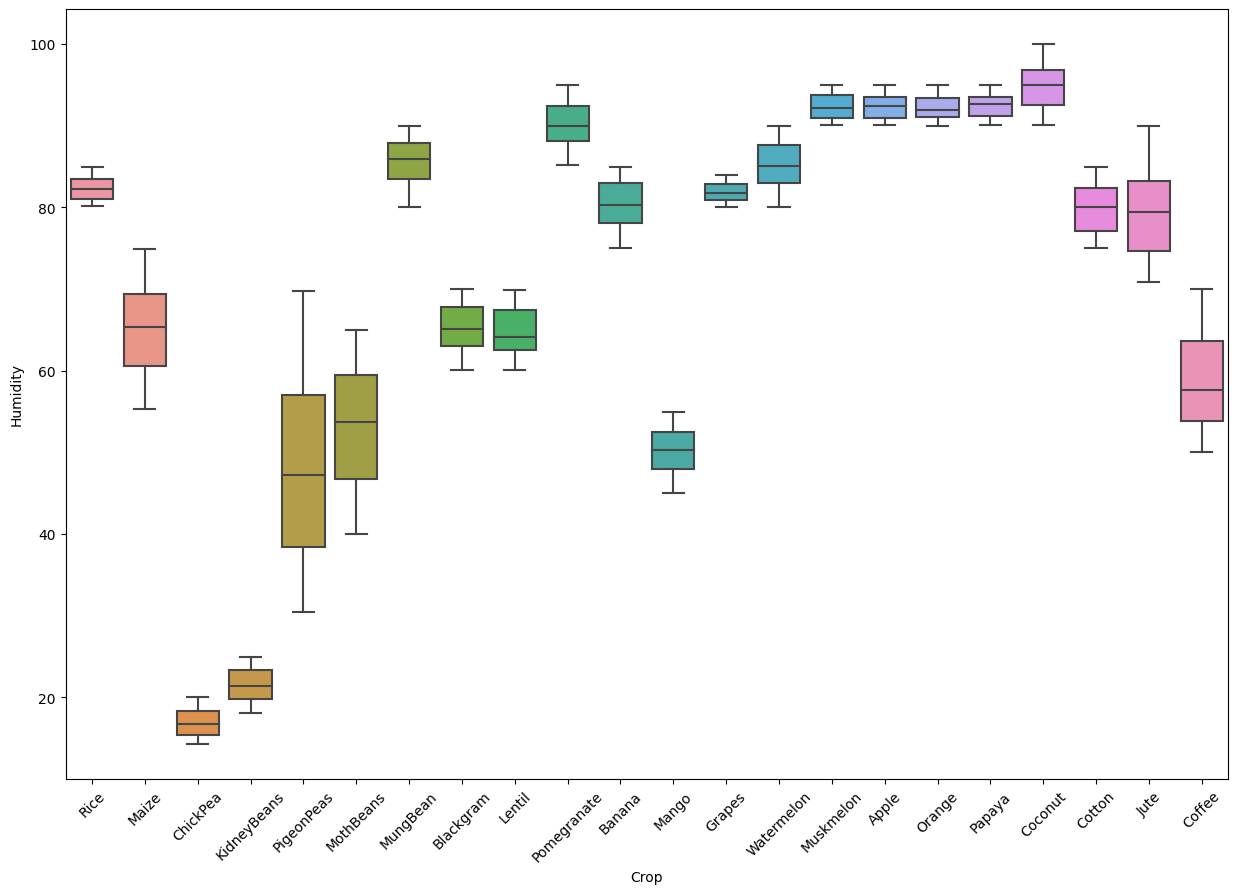

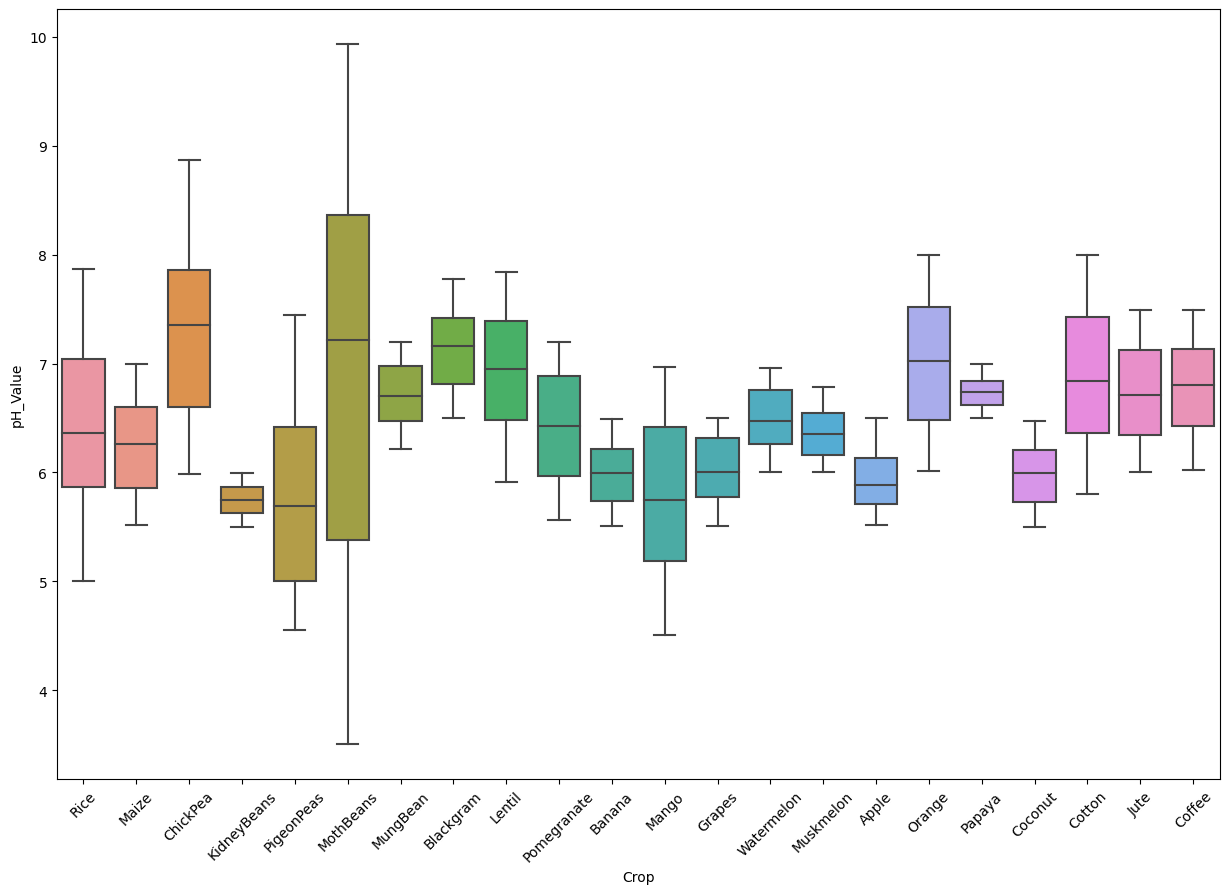

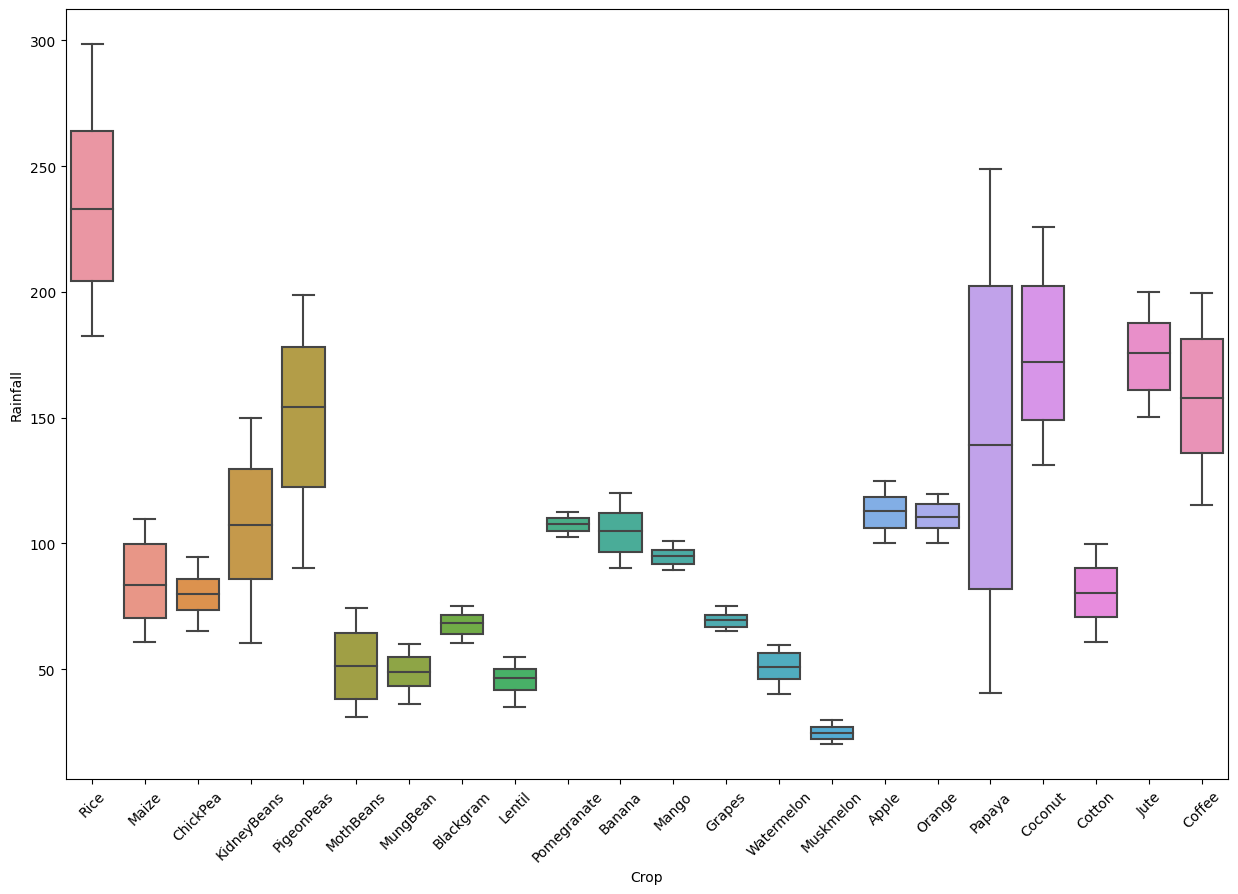

In [67]:
for col in df.columns[:-1]:
    plt.figure(figsize= (15,10))
    sns.boxplot(x = 'Crop', y = df[col] , data = df)
    plt.xticks(rotation = 45)
    plt.show()

#### looks like most outliers represent a full category of crops

In [68]:
for i in outliers:
    print(df[i]['Crop'].unique())

[]
['Grapes' 'Apple']
['Grapes' 'Apple']
['Grapes' 'Orange' 'Papaya']
['ChickPea']
['ChickPea' 'MothBeans' 'Mango']
['Rice' 'Papaya' 'Coconut']


- No missing values
- Outliers don't seem to be misleading
- Data is clean and balanced
- We only need to encode the Crop Column

# Preprocessing

In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])

<Axes: >

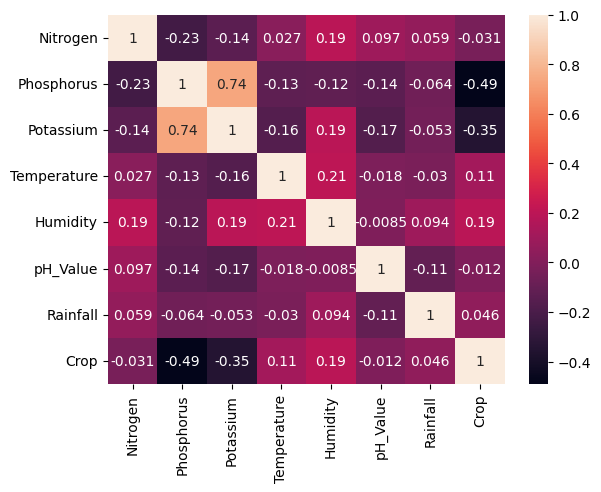

In [70]:
sns.heatmap(data = df.corr(), annot = True)

There is a correlation between Potassium and Phosphorus

<Axes: xlabel='Phosphorus', ylabel='Potassium'>

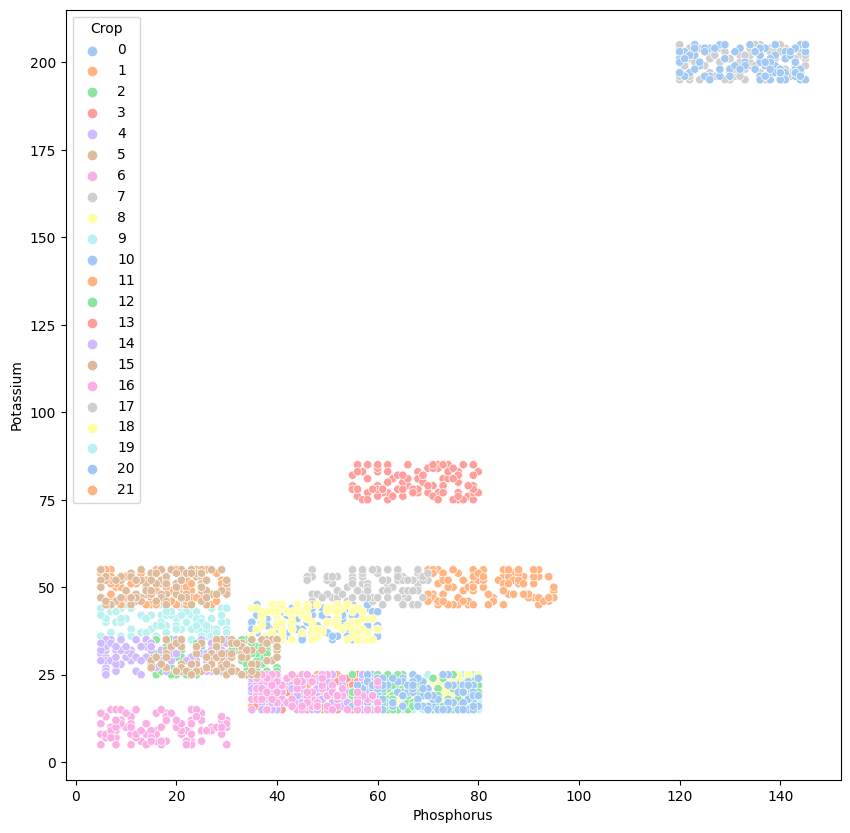

In [71]:
plt.figure(figsize= (10,10))
sns.scatterplot(x = 'Phosphorus', y = 'Potassium', data=df, hue='Crop', legend= 'full', palette = 'pastel')

In [72]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0, stratify = y)

In [73]:
x_train

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
43,82,40,40,23.830675,84.813601,6.271479,298.560117
785,27,60,17,26.417683,63.646983,7.026795,64.421771
304,2,61,20,22.139747,23.022511,5.955617,76.641283
938,5,24,40,24.692258,93.870301,6.297908,104.673545
1510,30,122,197,21.377847,92.720437,5.573241,106.141702
...,...,...,...,...,...,...,...
1773,56,50,52,33.087061,92.251975,6.770385,88.130077
1063,93,83,46,29.382540,83.504237,5.765309,109.248665
2108,118,18,32,27.649611,51.110440,6.351824,122.839282
940,39,30,38,20.126449,87.596296,6.965157,108.065579


In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[0.58571429, 0.25      , 0.175     , ..., 0.82305651, 0.43026142,
        1.        ],
       [0.19285714, 0.39285714, 0.06      , ..., 0.57614014, 0.54772281,
        0.15883128],
       [0.01428571, 0.4       , 0.075     , ..., 0.10224077, 0.38114081,
        0.20273127],
       ...,
       [0.84285714, 0.09285714, 0.135     , ..., 0.42989677, 0.44275609,
        0.36870285],
       [0.27857143, 0.17857143, 0.165     , ..., 0.85551767, 0.53813722,
        0.31562664],
       [0.42857143, 0.37857143, 0.16      , ..., 0.75662566, 0.39850932,
        0.54348342]])

In [75]:
x_test = scaler.transform(x_test)
x_test

array([[0.20714286, 0.07857143, 0.155     , ..., 0.87106931, 0.34766221,
        0.2969253 ],
       [0.40714286, 0.44285714, 0.1       , ..., 0.61075764, 0.62930001,
        0.15932365],
       [0.29285714, 0.49285714, 0.065     , ..., 0.54557725, 0.48121806,
        0.19100349],
       ...,
       [0.15714286, 0.46428571, 0.07      , ..., 0.07953905, 0.31271491,
        0.17689402],
       [0.09285714, 0.39285714, 0.1       , ..., 0.07392783, 0.33920755,
        0.38816613],
       [0.22857143, 0.36428571, 0.08      , ..., 0.86800362, 0.4973331 ,
        0.13683571]])

# Modelling

## KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train, y_train)

knn_pred = knn_model.predict(x_test)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn_score = accuracy_score(y_test,knn_pred)
knn_score

0.9772727272727273

In [78]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      0.90      0.92        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       0.95      1.00      0.98        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.83      0.95      0.88        20
           9       1.00      1.00      1.00        20
          10       0.91      1.00      0.95        20
          11       1.00      1.00      1.00        20
          12       0.95      1.00      0.98        20
          13       1.00      0.95      0.97        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    

In [79]:
conf_mat = confusion_matrix(y_test, knn_pred)
print(conf_mat)

[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [80]:
error_rate = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

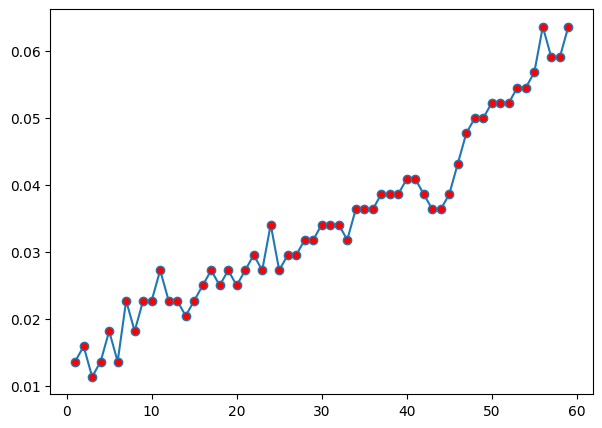

In [81]:
plt.figure(figsize = (7,5))
plt.plot(range(1,60), error_rate, marker = 'o', markerfacecolor = 'red')
plt.show()

#### The best number of neighbours is 7

## Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

In [83]:
dt_score = accuracy_score(y_test, dt_pred)
dt_score

0.9954545454545455

In [84]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.91      1.00      0.95        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    

## Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

nb_pred = nb_model.predict(x_test)

In [86]:
nb_score = accuracy_score(y_test, nb_pred)
nb_score

0.9954545454545455

In [87]:
nb_train_pred = nb_model.predict(x_train)
nb_train_score = accuracy_score(y_train, nb_train_pred)
nb_train_score

0.9948863636363636

In [88]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.91      1.00      0.95        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    

## Logistic Regression (OVR)

In [89]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

lr_model = OneVsRestClassifier(LogisticRegression())
lr_model.fit(x_train,y_train)

lr_pred = lr_model.predict(x_test)

In [90]:
lr_score = accuracy_score(y_test, lr_pred)
lr_score

0.9113636363636364

In [91]:
lr_train_pred = lr_model.predict(x_train)
lr_train_score = accuracy_score(y_train,lr_train_pred)
lr_train_score

0.9193181818181818

In [92]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.90      0.90      0.90        20
           3       1.00      1.00      1.00        20
           4       0.95      1.00      0.98        20
           5       0.91      1.00      0.95        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.88      0.35      0.50        20
           9       0.87      1.00      0.93        20
          10       0.87      1.00      0.93        20
          11       1.00      1.00      1.00        20
          12       0.77      1.00      0.87        20
          13       1.00      0.65      0.79        20
          14       0.87      1.00      0.93        20
          15       0.83      1.00      0.91        20
          16       1.00      0.90      0.95        20
          17       1.00    

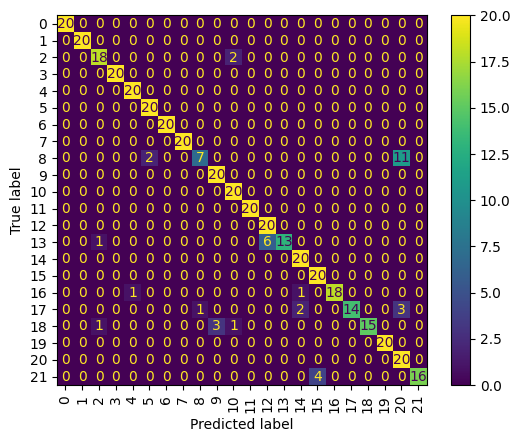

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    lr_model, 
    x_test, 
    y_test, 
    display_labels= list(range(0,22))
)
plt.xticks(rotation='vertical') 
plt.show()

# AdaBoost

In [94]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators = 50 , random_state = 42)
ada_model.fit(x_train,y_train)
ada_pred = ada_model.predict(x_test)
ada_score = accuracy_score(y_test,ada_pred)
ada_score


0.22727272727272727

In [95]:
ada_train_pred = ada_model.predict(x_train)
ada_train_score = accuracy_score(y_train, ada_train_pred)
ada_train_score

0.22727272727272727

## model comparison

In [ ]:
models = { 'Dection Tree' : dt_model,
           'Naive Bayes': nb_model,
           'KNN' : knn_model,
           'Logistic Regression': lr_model,
           'AdaBoost' :ada_model }
scores = [dt_score,nb_score,knn_score, lr_score, ada_score]
model_comparison = {'model': models.keys(), 'accuracy_score': scores}

pd.DataFrame(model_comparison).sort_values(by = 'accuracy_score', ascending = False)

,model,accuracy_score
0,Random Forest,0.997727
1,Dection Tree,0.995455
2,Naive Bayes,0.995455
3,KNN,0.977273
4,SVM,0.977273
5,Logistic Regression,0.911364
6,AdaBoost,0.227273


In [101]:
from sklearn.model_selection import KFold, cross_val_score


kf = KFold(n_splits = 5, random_state = 42, shuffle = True)

cv_scores = []
for model_name,model in models.items():
    cv_pred = cross_val_score(model, x_train, y_train, cv=kf)
    mean_pred = cv_pred.mean()
    cv_scores.append(mean_pred)
cv_scores

[0.9943181818181819,
 0.98125,
 0.9948863636363636,
 0.9755681818181818,
 0.9647727272727273,
 0.9028409090909092,
 0.1556818181818182]

In [102]:
models_cv_scores = {'model': models.keys(), 'cv_score': cv_scores}
models_cv_scores_df = pd.DataFrame(models_cv_scores).sort_values(by='cv_score', ascending = False)
models_cv_scores_df

,model,cv_score
2,Naive Bayes,0.994886
0,Random Forest,0.994318
1,Dection Tree,0.981250
3,KNN,0.975568
4,SVM,0.964773
5,Logistic Regression,0.902841
6,AdaBoost,0.155682


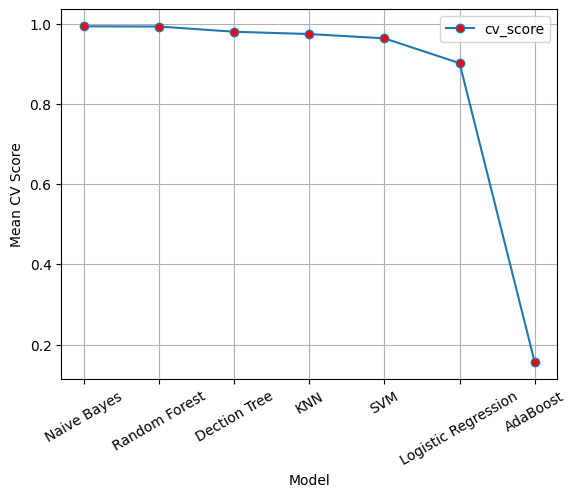

In [103]:
models_cv_scores_df.plot(x = 'model', marker = 'o', markerfacecolor = 'r')
plt.grid(True)
plt.xlabel('Model')
plt.ylabel('Mean CV Score')
plt.xticks(rotation = 30)
plt.show()

# Deployment

In [104]:
final_model = nb_model

In [105]:
import pickle
file_name = 'CropPrediction.sav'
pickle.dump(nb_model,open(file_name,'wb'))